# Neural Network for the Approximation of $y=sin(x)$
Import Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the activation function and its derivative the sigmoid function

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error Loss
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


Initialise the training data

In [3]:
# Initialize data
x = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)  # Input data
y = np.sin(x)                                       # Target data


Define the network parameters

In [4]:
# Network Parameters
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01

# Initialize weights and biases
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_output = np.random.uniform(-1, 1, (1, output_size))


Train the network

In [5]:
# Training the network
epochs = 10000
losses = []  # Store loss for visualization
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(x, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = output_layer_input  # Linear output for regression

    # Compute loss
    loss = mse_loss(y, output)
    losses.append(loss)

    # Backpropagation
    output_error = y - output
    output_delta = output_error  # Derivative of linear output is 1

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    
    weights_input_hidden += x.T.dot(hidden_delta) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}", end="\r")


Plot the true and fitted functions

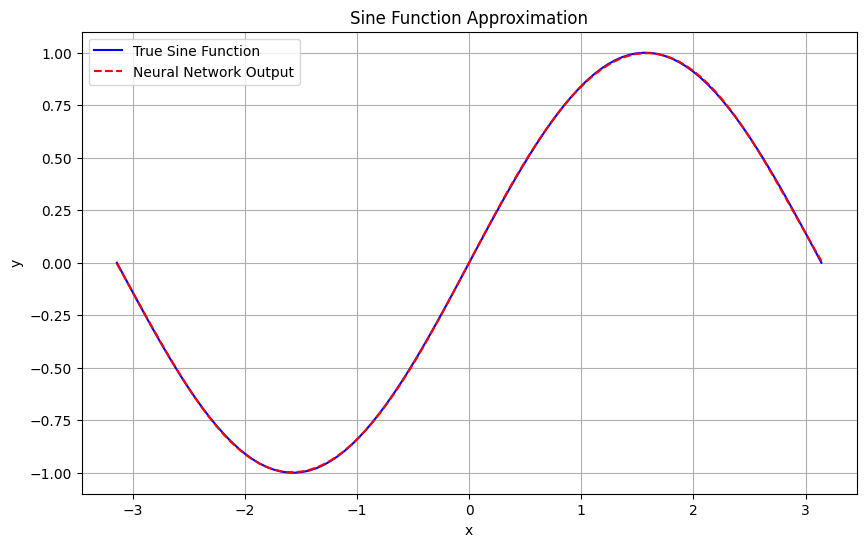

In [6]:
# Plot sine function vs neural network output
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="True Sine Function", color='blue')
plt.plot(x, output, label="Neural Network Output", color='red', linestyle='--')
plt.title("Sine Function Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


Plot the residuals

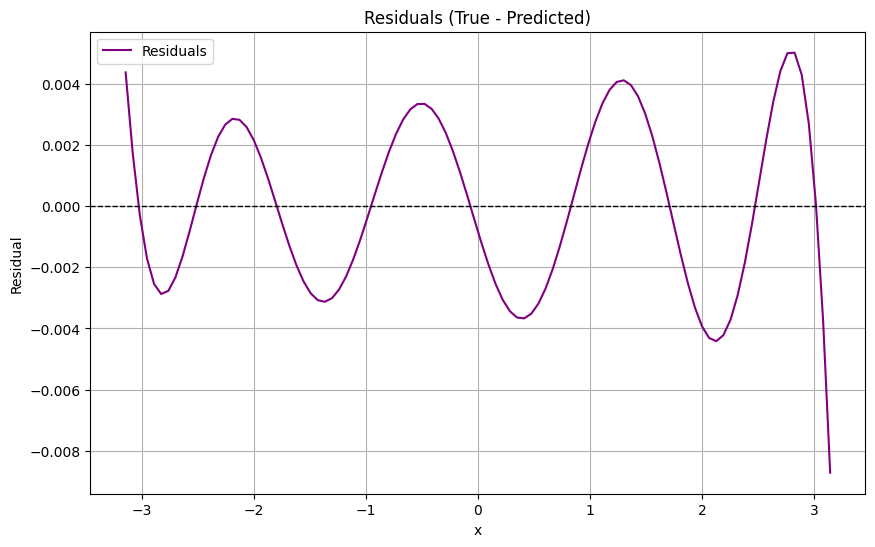

In [7]:
residuals = y - output
plt.figure(figsize=(10, 6))
plt.plot(x, residuals, label="Residuals", color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Residuals (True - Predicted)")
plt.xlabel("x")
plt.ylabel("Residual")
plt.legend()
plt.grid()
plt.show()


Plot the training loss

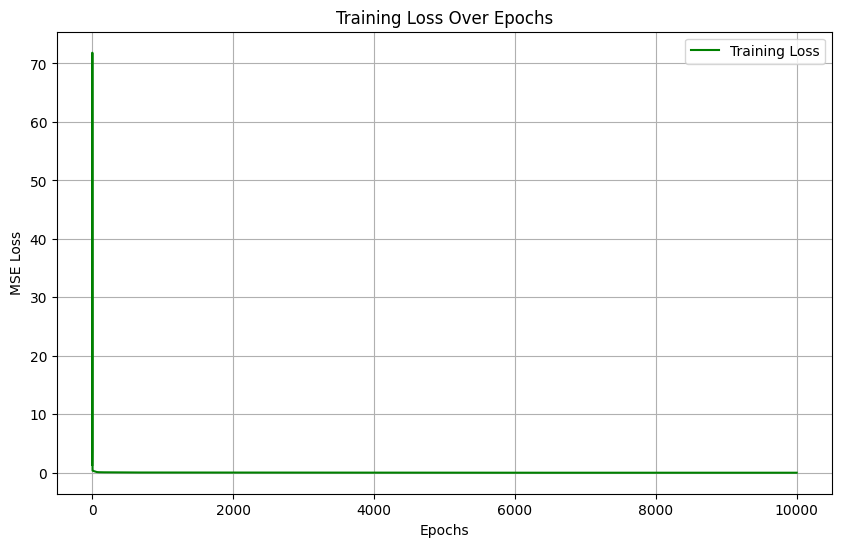

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, label="Training Loss", color='green')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid()
plt.show()
